# J Real Estate Development

J Real Estate Development is a developer who is looking to develop in areas that are highly walkable for people. They will begin by survey areas in the state of California, Nebraska , and Washington.  They will then send their results to management to approve their proposals.  If approved, J Real Estate Development will begin the process to develop in that city / town.

# Business Process Flow
Survey and approval process for development projects.



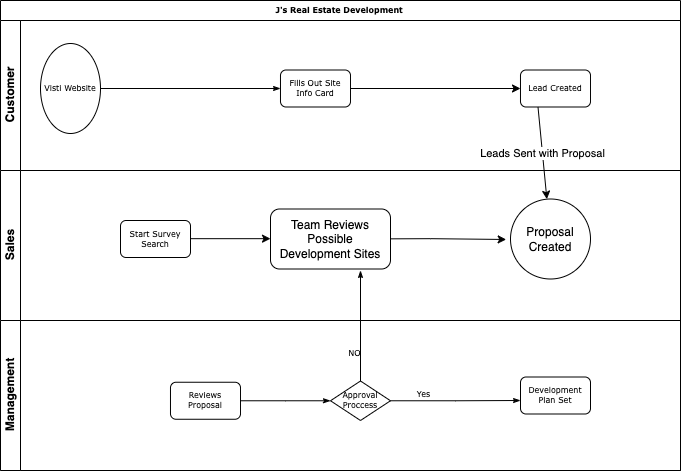

In [15]:
from IPython.display import Image
Image(filename='JREDFlow.drawio.png')

## Entity Relationship Diagram
The relationship come from customers, sales team, management, and national walk ability index.

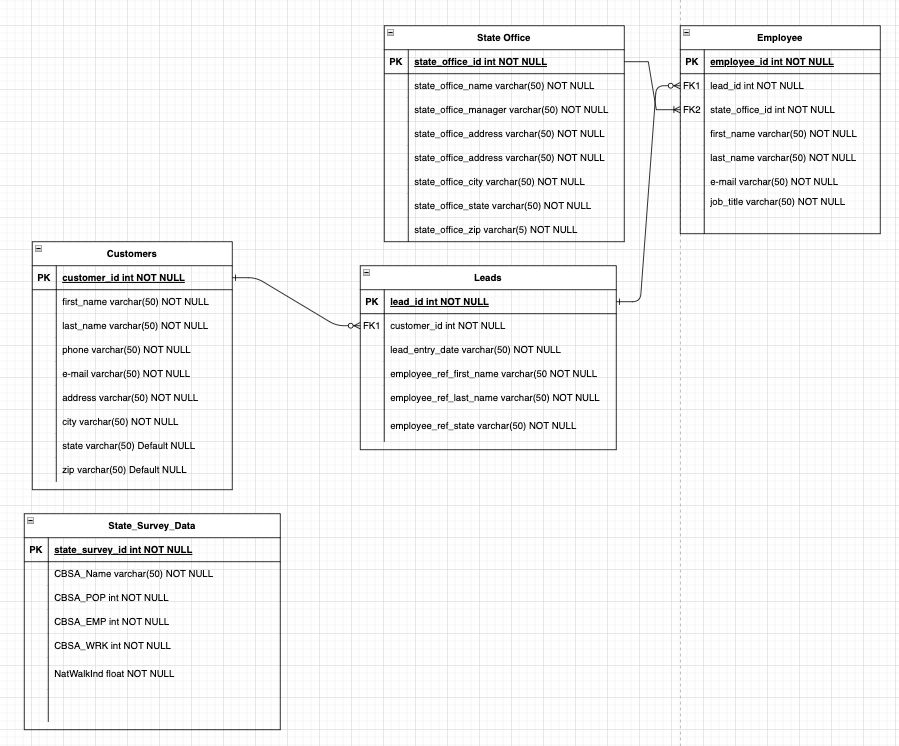

In [16]:
from IPython.display import Image
Image(filename='ERD.png')

## J Real Estate Development Database DDL
Faker.py and data from data.gov was used to generate data. The following tables will be created to collect the necessary data.


CREATE TABLE `customers` (
    `customer_id` int NOT NULL,
    `first_name` varchar(50) NOT NULL,
    `last_name` varchar(50) NOT NULL,
    `phone` varchar(50) NOT NULL,
    `email` varchar(50) NOT NULL,
    `address` varchar(50) NOT NULL,
    `city` varchar(50) NOT NULL,
    `state` varchar(50) DEFAULT NULL,
    `zip` int DEFAULT NULL,
    PRIMARY KEY (`customer_id`)
);

CREATE TABLE `employees` (
    `employee_id` int NOT NULL,
    `first_name` varchar(50) NOT NULL,
    `last_name` varchar(50) NOT NULL,
    `email` varchar(100) NOT NULL,
    `job_title` varchar(10) NOT NULL,
    `state_office_id` int DEFAULT NULL,
    PRIMARY KEY (`employee_id`),
    CONSTRAINT `employees_fk` FOREIGN KEY (`state_office_id`) REFERENCES `state_office` (`state_office_id`)
);

CREATE TABLE `state_office` (
    `state_office_id` int NOT NULL,
    `state_office_name` varchar(50) NOT NULL,
    `state_office_manager` varchar(50) NOT NULL,
    'state_office_address' varchar(50) NOT NULL,
    'state_office_city' varchar(50) NOT NULL,
    'state_office_zip' varchar(5) NOT NULL,
     PRIMARY KEY (`state_no`)
);

CREATE TABLE `state_survey_data` (
    `state_survey_id` int NOT NULL,
    `State` VARCHAR(255) NOT NULL,
    `City` INT NOT NULL,
    `City Population` INT NOT NULL,
    `Avg. Walk Score` INT NOT NULL,
     PRIMARY KEY (`state_survey_id`)
);

CREATE TABLE customer_leads (
    'customer_first_name' VARCHAR(255),
    'customer_last_name' VARCHAR(255),
    'lead_entry_date' DATE,
    'employee_ref_first_name' VARCHAR(255),
    'employee_ref_last_name' VARCHAR(255),
    'employee_ref_state' CHAR(2)
);

#Customers.py


In [6]:
from faker import Faker
import boto3
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from io import BytesIO

fake = Faker()
states = ['WA', 'NE', 'CA']
state_cities = {
    'WA': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Kent', 'Everett', 'Renton', 'Spokane Valley', 'Kirkland', 'Federal Way', 'Yakima', 'Bellingham', 'Auburn', 'Kennewick', 'Pasco', 'Redmond', 'Sammamish', 'Marysville', 'South Hill'],
    'NE': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney','Fremont','Hastings','Norfolk','Columbus','North Platte','Papillion','La Vista','Scottsbluff','South Sioux City','Beatrice','Chalco','Lexington','Gering','York','Alliance'],
    'CA': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno','Sacramento','Long Beach','Oakland','Bakersfield','Anaheim','Stockton','Riverside','Santa Ana','Irvine','Chula Vista','Fremont','Santa Clarita','San Bernardino','Modesto','Moreno Valley']
}

def generate_data(num=2000):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"First_Name":fake.first_name(),
                       "Last_Name":fake.last_name(),
                       "Phone":fake.phone_number(),
                       "Email":fake.first_name().lower() + '.' + fake.last_name().lower() + '@faker.com',
                       "Address":fake.street_address(),
                       "City":city,
                       "State":state,
                       "Zip_Code":fake.zipcode()})
    return pd.DataFrame(output)

def generate_data(num=2000):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"First_Name":fake.first_name(),
                       "Last_Name":fake.last_name(),
                       "Phone":fake.phone_number(),
                       "Email":fake.first_name().lower() + '.' + fake.last_name().lower() + '@faker.com',
                       "Address":fake.street_address(),
                       "City":city,
                       "State":state,
                       "Zip_Code":fake.zipcode()})
    return pd.DataFrame(output)

df = generate_data()

bucket = "jgpromineo" # your bucket name
parquet_buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, "fake_customer_data.parquet").put(Body=parquet_buffer.getvalue())

print(df)

     First_Name Last_Name                   Phone                       Email  \
0          Mary   Mccarty  001-678-878-6598x24304      megan.wilson@faker.com   
1        Robert    Kelley   001-044-211-5054x2149       joseph.kent@faker.com   
2     Alexandra   Watkins    001-423-763-6312x593    jessica.cooley@faker.com   
3       Jeffrey     Weber        001-464-085-9178     sarah.cameron@faker.com   
4       Melissa    Nguyen    001-306-351-2133x606    michael.reilly@faker.com   
...         ...       ...                     ...                         ...   
1995     Daniel     Cantu           (254)042-8639      jared.gentry@faker.com   
1996      Sarah     Jones              0023557925      victor.white@faker.com   
1997     Robert      Lara     +1-104-269-0315x272        sean.jones@faker.com   
1998     Hector    Parker           (583)277-0746  michele.thornton@faker.com   
1999    Michael  Woodward         +1-945-097-2164   andrew.whitaker@faker.com   

                           

#Employees.py

In [7]:
from faker import Faker
import boto3
import pyarrow as pa
import pyarrow.parquet as pq
from io import BytesIO

fake = Faker()
states = ['WA', 'NE', 'CA']
state_cities = {
    'WA': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Kent', 'Everett', 'Renton', 'Federal Way', 'Yakima'],
    'NE': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney','Fremont','Hastings','Norfolk','Columbus','North Platte'],
    'CA': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Fresno','Sacramento','Long Beach','Oakland','Bakersfield','Anaheim']
}

def generate_data(num=30):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"First_Name":fake.first_name(),
                       "Last_Name":fake.last_name(),
                       "Phone":fake.phone_number(),
                       "Email":fake.first_name().lower() + '.' + fake.last_name().lower() + '@jred.com',
                       "Address":fake.street_address(),
                       "City":city,
                       "State":state,
                       "Zip_Code":fake.zipcode()})
    return pd.DataFrame(output)

df = generate_data()

bucket = "jgpromineo" # your bucket name
parquet_buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, "fake_employee_data.parquet").put(Body=parquet_buffer.getvalue())

print(df)

   First_Name  Last_Name                   Phone                        Email  \
0      Travis      Yates        860-099-6727x925      jared.gonzalez@jred.com   
1      Justin       Hill        583-273-5047x592       kevin.mendoza@jred.com   
2       Sarah     Spears    001-275-159-3598x795        janet.garcia@jred.com   
3     Tiffany       Khan        640-258-0943x027       justin.gibson@jred.com   
4       Maria     Mendez       (882)352-8278x418      robert.bradley@jred.com   
5         Ian       Rose            793.424.9721       kristin.craig@jred.com   
6      Nicole      Silva   +1-944-937-5064x03276        stephen.ward@jred.com   
7        Tony   Mcdaniel            820.908.6863       jacob.pacheco@jred.com   
8   Christina   Robinson            758.864.8589          david.rose@jred.com   
9   Stephanie  Rodriguez            971-715-3000        tricia.moore@jred.com   
10   Jennifer    Sherman              4364686264     paula.rodriguez@jred.com   
11     Cheryl   Anderson    

#State Office.py

In [8]:
from faker import Faker
import boto3
import pyarrow as pa
import pyarrow.parquet as pq
from io import BytesIO

fake = Faker()
states = ['WA', 'NE', 'CA']
state_cities = {
    'WA': ['Seattle', 'Spokane', 'Tacoma', 'Vancouver', 'Bellevue', 'Kent', 'Everett', 'Renton', 'Federal Way', 'Yakima'],
    'NE': ['Omaha', 'Lincoln', 'Bellevue', 'Grand Island', 'Kearney','Fremont','Hastings','Norfolk','Columbus','North Platte'],
    'CA': ['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', '<EUGPSCoordinates>Fresno</EUGPSCoordinates>','Sacramento','Long Beach','Oakland','Bakersfield','Anaheim']
}

def generate_data(num=30):
    output = []
    for x in range(num):
        state = states[fake.random_int(0,2)]
        city = fake.random_element(state_cities[state])
        output.append({"state_office_id":x,
                       "state_office_name":f"{state} Office",
                       "state_office_manager":fake.name(),
                       "state_office_address":fake.street_address(),
                       "state_office_city":city,
                       "state_office_zip":fake.zipcode()})
    return pd.DataFrame(output)

df = generate_data()

bucket = "jgpromineo" # your bucket name
parquet_buffer = BytesIO()
table = pa.Table.from_pandas(df)
pq.write_table(table, parquet_buffer)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, "state_office.parquet").put(Body=parquet_buffer.getvalue())

print(df)

    state_office_id state_office_name state_office_manager  \
0                 0         NE Office      Nicholas Carter   
1                 1         NE Office        Shawn Johnson   
2                 2         WA Office         Donald Velez   
3                 3         CA Office           Kelly Lutz   
4                 4         CA Office            Amy Burns   
5                 5         CA Office         Ashley Smith   
6                 6         WA Office  Dr. Bryan Wilson MD   
7                 7         NE Office      Douglas Barrett   
8                 8         CA Office          Travis Long   
9                 9         NE Office            Amy Jones   
10               10         CA Office       Amanda Acevedo   
11               11         WA Office        David Johnson   
12               12         WA Office     Belinda Martinez   
13               13         WA Office       Leroy Franklin   
14               14         CA Office       Michael Walker   
15      

#Average Walk Score
Data gathered from WalkScore.com and inputed into a .csv file.  The file is then imported to S3.

In [13]:
# Set the name of the bucket and the file to upload
bucket_name = 'jgpromineo'
file_name = 'WalkScore.csv'

# Create an S3 client
s3 = boto3.client('s3')

# Upload the file to the specified bucket
s3.upload_file(file_name, bucket_name, file_name)

#Customer Leads.py

In [11]:
import boto3
import pandas as pd
from datetime import datetime, timedelta
from random import randrange
from io import BytesIO

s3 = boto3.client('s3')
bucket = 'jgpromineo'
employee_key = 'fake_employee_data.parquet'
customer_key = 'fake_customer_data.parquet'
customer_leads_key = 'customer_leads.parquet'

# Create new DataFrame with specified columns
columns = ['customer_first_name', 'customer_last_name', 'lead_entry_date', 'employee_ref_first_name', 'employee_ref_last_name', 'employee_ref_state']
customer_leads = pd.DataFrame(columns=columns)

# Generate fake data for lead_entry_date column
num_rows = 10  # specify the number of rows you want to generate
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
date_range = (end_date - start_date).days
customer_leads['lead_entry_date'] = [start_date + timedelta(days=randrange(date_range)) for _ in range(num_rows)]

# Read data from Employee table
obj = s3.get_object(Bucket=bucket, Key=employee_key)
employee_data = pd.read_parquet(BytesIO(obj['Body'].read()))

# Fill in employee_ref columns with data from Employee table
customer_leads['employee_ref_first_name'] = employee_data['First_Name'][:num_rows]
customer_leads['employee_ref_last_name'] = employee_data['Last_Name'][:num_rows]
customer_leads['employee_ref_state'] = employee_data['State'][:num_rows]

# Read data from Customer table
obj = s3.get_object(Bucket=bucket, Key=customer_key)
customer_data = pd.read_parquet(BytesIO(obj['Body'].read()))

# Fill in customer_first_name and customer_last_name columns with data from Customer table
customer_leads['customer_first_name'] = customer_data['First_Name'][:num_rows]
customer_leads['customer_last_name'] = customer_data['Last_Name'][:num_rows]

# Write customer_leads data to S3 bucket
buffer = BytesIO()
customer_leads.to_parquet(buffer, engine='pyarrow')
s3.put_object(Bucket=bucket, Key=customer_leads_key, Body=buffer.getvalue())

{'ResponseMetadata': {'RequestId': 'VT8QBADDPXA0G34A',
  'HostId': 'cletC9B0hGjKAI1hl5C3iW4vT1Tw4UiZn3PEBuTePz0pC+uJUNC87o8DY3ca5sUDJkK3bxexIwg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'cletC9B0hGjKAI1hl5C3iW4vT1Tw4UiZn3PEBuTePz0pC+uJUNC87o8DY3ca5sUDJkK3bxexIwg=',
   'x-amz-request-id': 'VT8QBADDPXA0G34A',
   'date': 'Thu, 08 Jun 2023 19:43:02 GMT',
   'x-amz-version-id': '4uKyrGnhcRDIle3mUBMA.ydbAMYXjB6Q',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"ecb229c74978dc75e3eb4636f58daab8"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"ecb229c74978dc75e3eb4636f58daab8"',
 'ServerSideEncryption': 'AES256',
 'VersionId': '4uKyrGnhcRDIle3mUBMA.ydbAMYXjB6Q'}

#Customers Verified

In [5]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext(

)
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="jgcapstone",
    table_name="fake_customer_data_parquet",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("first_name", "string", "first_name", "string"),
        ("last_name", "string", "last_name", "string"),
        ("phone", "string", "phone", "string"),
        ("email", "string", "email", "string"),
        ("address", "string", "address", "string"),
        ("city", "string", "city", "string"),
        ("state", "string", "state", "string"),
        ("zip_code", "string", "zip_code", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Data Catalog table
DataCatalogtable_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="fake_customer_data_parquet",
    transformation_ctx="DataCatalogtable_node3",
)

job.commit()


GlueArgumentError: the following arguments are required: --Verified Customers.py

#Employees Verified

In [1]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": [
            "s3://jgpromineo/Data/fake_employee_data.parquet/fake_employee_data.parquet"
        ],
        "recurse": True,
    },
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("First_Name", "string", "first_name", "string"),
        ("Last_Name", "string", "last_name", "string"),
        ("Phone", "string", "phone", "string"),
        ("Email", "string", "email", "string"),
        ("Address", "string", "address", "string"),
        ("City", "string", "city", "string"),
        ("State", "string", "state", "string"),
        ("Zip_Code", "string", "zip_code", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Data Catalog table
DataCatalogtable_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="fake_employee_data_parquet",
    transformation_ctx="DataCatalogtable_node3",
)

job.commit()


GlueArgumentError: the following arguments are required: --JOB_NAME

#State Offices Verified

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node Data Catalog table
DataCatalogtable_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="jgcapstone",
    table_name="state_office",
    transformation_ctx="DataCatalogtable_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=DataCatalogtable_node1,
    mappings=[
        ("state_office_id", "long", "state_office_id", "long"),
        ("state_office_name", "string", "state_office_name", "string"),
        ("state_office_manager", "string", "state_office_manager", "string"),
        ("state_office_address", "string", "state_office_address", "string"),
        ("state_office_city", "string", "state_office_city", "string"),
        ("state_office_zip", "string", "state_office_zip", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Data Catalog table
DataCatalogtable_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="state_office",
    transformation_ctx="DataCatalogtable_node3",
)

job.commit()


#Average Walk Scores Verified

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_catalog(
    database="jgcapstone", table_name="walkscore", transformation_ctx="S3bucket_node1"
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("state", "string", "state", "string"),
        ("city", "string", "city", "string"),
        ("city_population", "long", "city_population", "long"),
        ("avg_walk_score", "long", "avg_walk_score", "long"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Data Catalog table
DataCatalogtable_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="walkscore",
    transformation_ctx="DataCatalogtable_node3",
)

job.commit()


#Customer Leads Verified

In [ ]:
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node S3 bucket
S3bucket_node1 = glueContext.create_dynamic_frame.from_options(
    format_options={},
    connection_type="s3",
    format="parquet",
    connection_options={
        "paths": ["s3://jgpromineo/Data/Customer_leads/"],
        "recurse": True,
    },
    transformation_ctx="S3bucket_node1",
)

# Script generated for node ApplyMapping
ApplyMapping_node2 = ApplyMapping.apply(
    frame=S3bucket_node1,
    mappings=[
        ("customer_first_name", "string", "customer_first_name", "string"),
        ("customer_last_name", "string", "customer_last_name", "string"),
        ("lead_entry_date", "timestamp", "lead_entry_date", "timestamp"),
        ("employee_ref_first_name", "string", "employee_ref_first_name", "string"),
        ("employee_ref_last_name", "string", "employee_ref_last_name", "string"),
        ("employee_ref_state", "string", "employee_ref_state", "string"),
    ],
    transformation_ctx="ApplyMapping_node2",
)

# Script generated for node Verified_Customer_Leads
Verified_Customer_Leads_node3 = glueContext.write_dynamic_frame.from_catalog(
    frame=ApplyMapping_node2,
    database="jgcapstone",
    table_name="customer_leads",
    transformation_ctx="Verified_Customer_Leads_node3",
)

job.commit()
